In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def generate_signal(amplitude1, mean1, std1, amplitude2, mean2, std2, amplitude3, mean3, std3):
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

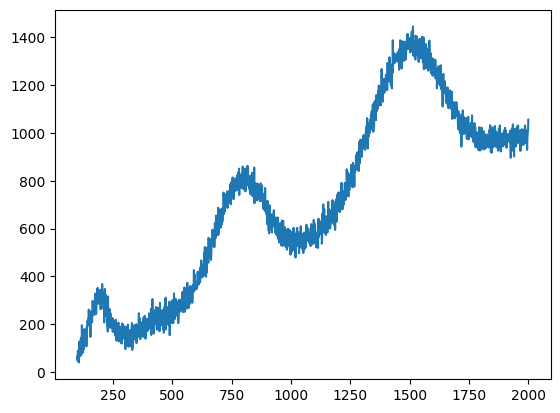

In [3]:
xx, yy = generate_signal(222, 188, 40, 422, 788, 100, 622, 1488, 150)
zz = 0.5*xx + yy
plt.plot(xx, zz)

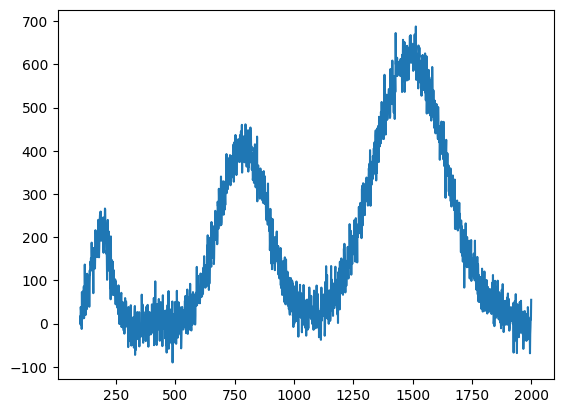

In [4]:
plt.plot(xx, yy)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(f, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(f, np.ones(window_size)/window_size, mode='same')
    return baseline

def plot_signal_with_baseline_correction(window_size):
    # Estimate the baseline
    # zz
    baseline = estimate_baseline(zz, window_size)


    # Correct the signal by subtracting the baseline
    corrected_signal = zz - baseline

    # Plot the original and corrected signals
    plt.figure(figsize=(8, 6))
    plt.plot(xx, zz, label='Original Signal')
    plt.plot(xx, corrected_signal, label='Corrected Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Signal with Baseline Correction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Create an interactive slider for window size
window_size_slider = IntSlider(min=1, max=2*len(xx), step=1, value=100, description='Window Size')

# Create the interactive plot
interact(plot_signal_with_baseline_correction, window_size=window_size_slider);

interactive(children=(IntSlider(value=100, description='Window Size', max=3802, min=1), Output()), _dom_classe…